# Feature Engineering. Практическая работа

Сдаётся на проверку.

## Цели практической работы

Научиться: 

*   генерировать новые признаки; 
*   нормализовать и кодировать данные с помощью lambda-функций и библиотеки scikit-learn.


## Что входит в практическую работу

1. Построить признаки из строк.
2. Преобразовать категориальные переменные.
3. Стандартизировать данные.
4. Использовать MinMaxScaler для нормализации данных.
5. Создать признаки на основе дат.
6. Сохранить датафрейм для этапа моделирования.

## Что оценивается
- Программа выдаёт верный ответ на заданном наборе данных.
- Описаны причины выбранного решения, если требуется.
- Код читабелен: переменным даны осмысленные названия, соблюдены отступы и правила расстановки пробелов.
- При построении графиков название и оси подписаны, выведена легенда, если требуется. 
- Репозиторий проекта содержит осмысленные коммиты, содержащие конкретные реализованные фичи, ветки названы согласно назначению, лишние файлы не хранятся в репозитории.
- В репозитории проекта соблюдена иерархия директорий согласно списку модулей и содержащихся в них тем.
- Репозиторий проекта содержит файлы с данными, полученными в результате выполнения практической работы.


## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему проверяющему куратору.


## Задача

Мы продолжим исследовать и готовить данные для этапа моделирования.

Вам предстоит работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset_upd.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

В этой практической работе вы продолжите генерировать дополнительные признаки и завершите подготовку датасета для этапа моделирования.

## Описание датасета:
- `id`— идентификатор записи;
- `url`— URL-записи о продаже;
- `region`— регион;
- `region_url`— URL региона;
- `price`— стоимость;
- `year`— год выпуска;
- `manufacturer`— производитель;
- `model`— модель;
- `condition`— состояние;
- `cylinders`— количество цилиндров;
- `fuel`— тип топлива;
- `odometer`— количество пройденных миль;
- `title_status`— статус;
- `transmission`— коробка передач;
- `VIN`— идентификационный номер;
- `drive`— тип привода;
- `size`— размер;
- `type`— кузов;
- `paint_color`— цвет;
- `image_url`— URL изображения;
- `description`— указанное описание;
- `county`— страна;
- `state`— штат;
- `lat`— широта;
- `long`— долгота;
- `posting_date`— дата размещения объявления о продаже;
- `price_category`— категория цены.


In [1]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from datetime import datetime

### Задача 1. Построение признаков из строк

1. Загрузите датасет из `data/vehicles_dataset_upd6.csv`, выведите первые пять записей и список колонок.

In [3]:
# Load dataset
df = pd.read_csv('C:\\Users\\user\\Downloads\\vehicles_dataset_upd6.csv')
print(df.head())
print(df.columns)

           id                                                url  \
0  7308295377  https://chattanooga.craigslist.org/ctd/d/chatt...   
1  7316380095  https://newjersey.craigslist.org/ctd/d/carlsta...   
2  7313733749  https://reno.craigslist.org/ctd/d/atlanta-2017...   
3  7308210929  https://fayetteville.craigslist.org/ctd/d/rale...   
4  7303797340  https://knoxville.craigslist.org/ctd/d/knoxvil...   

         region                           region_url  price  year  \
0   chattanooga   https://chattanooga.craigslist.org  54990  2020   
1  north jersey     https://newjersey.craigslist.org  16942  2016   
2  reno / tahoe          https://reno.craigslist.org  35590  2017   
3  fayetteville  https://fayetteville.craigslist.org  14500  2013   
4     knoxville     https://knoxville.craigslist.org  14590  2012   

  manufacturer                   model    fuel  odometer  ... is_jeep  \
0          ram  2500 crew cab big horn  diesel     27442  ...       0   
1         ford    explorer 4wd

2. Выведите список значений и количество уникальных значений для модели автомобиля.

In [3]:
# List unique values for car model
print(df['model'].value_counts())
print(df['model'].nunique())

f-150                        145
other                        107
silverado 1500               105
1500                          99
camry                         76
                            ... 
sierra1500 crewcab 4x4         1
corolla se                     1
xc60 t6 inscription sport      1
silverado 1500 ls              1
a3 2.0t premium plus pzev      1
Name: model, Length: 3341, dtype: int64
3341


3. Количество уникальных значений велико. Попробуем их сократить, оставив только первое слово в наименовании модели. С помощью lambda-функции и преобразования над строками создайте новый признак `short_model`, содержащий только первое слово из наименования модели, выведите его и количество получившихся уникальных значений.

In [4]:
# 3
df['short_model'] = df['model'].apply(lambda x: str(x).split(' ')[0])
print(df['short_model'].value_counts())
print(df['short_model'].nunique())


silverado    392
1500         205
wrangler     204
grand        201
f-150        197
            ... 
sle            1
classuc        1
s3             1
cts-v          1
gs350          1
Name: short_model, Length: 943, dtype: int64
943


### Задача 2. Преобразование категориальных переменных

1. Для категориальных переменных `short_model`, `transmission`, `region`, `manufacturer`, `state`, `title_status`, `age_category` распечатайте наименование категории и количество уникальных значений в ней.


In [5]:
# 4
categorical_cols = ['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'age_category']
for col in categorical_cols:
    print(f"{col} unique values: {df[col].nunique()}")
    print("")

short_model unique values: 943

transmission unique values: 3

region unique values: 393

manufacturer unique values: 40

state unique values: 51

title_status unique values: 6

age_category unique values: 3



2. Создайте датафрейм `data`, содержащий только выбранные категориальные переменные.

In [6]:
# 5
data = df[categorical_cols]
print(data)

     short_model transmission                   region manufacturer state  \
0           2500        other              chattanooga          ram    tn   
1       explorer    automatic             north jersey         ford    nj   
2           golf        other             reno / tahoe   volkswagen    ca   
3           rav4    automatic             fayetteville       toyota    nc   
4              1        other                knoxville          bmw    tn   
...          ...          ...                      ...          ...   ...   
9614        rav4    automatic               chautauqua       toyota    ny   
9615    wrangler        other               binghamton         jeep    ny   
9616          a3    automatic                    salem         audi    or   
9617     cayenne    automatic                  madison      porsche    wi   
9618        1500        other  norfolk / hampton roads          ram    va   

     title_status age_category  
0           clean          new  
1        

3. Создайте объект класса OneHotEncoder, который будет отвечать за преобразование. Уточните, что на выходе должна быть неразреженная матрица.

In [7]:
# 6
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder

OneHotEncoder(sparse=False)

In [8]:
# 7
one_hot_encoder.fit(data)

c:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

4. Идентифицируйте параметры преобразования на датафрейме с категориальными переменными.

In [9]:
# 7
one_hot_encoder.fit(data)

c:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [14]:
# 8
one_hot_encoded = one_hot_encoder.transform(data)
print(one_hot_encoded)
print(one_hot_encoded.shape)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(9619, 3837)


5. Примените преобразование для датафрейма с категориальными переменными и сохраните в новую переменную, распечатайте получившуюся матрицу и её размерность.

In [10]:
# 8
one_hot_encoded = one_hot_encoder.transform(data)
print(one_hot_encoded)
print(one_hot_encoded.shape)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(9619, 1439)


6.Выведите новые наименования признаков с помощью метода get_feature_names_out.

In [12]:
# 9
feature_names = one_hot_encoder.get_feature_names_out(categorical_cols)
print(feature_names)

['short_model_-benz' 'short_model_1' 'short_model_124' ...
 'age_category_average' 'age_category_new' 'age_category_old']


7. Добавьте в исходный датафрейм получившиеся новые признаки, выведите первые пять записей датафрейма и список колонок.

In [13]:
# 10
df_encoded = pd.DataFrame(one_hot_encoded, columns=feature_names)
df = pd.concat([df, df_encoded], axis=1)
print(df.head())
print(df.columns)


           id                                                url  \
0  7308295377  https://chattanooga.craigslist.org/ctd/d/chatt...   
1  7316380095  https://newjersey.craigslist.org/ctd/d/carlsta...   
2  7313733749  https://reno.craigslist.org/ctd/d/atlanta-2017...   
3  7308210929  https://fayetteville.craigslist.org/ctd/d/rale...   
4  7303797340  https://knoxville.craigslist.org/ctd/d/knoxvil...   

         region                           region_url  price  year  \
0   chattanooga   https://chattanooga.craigslist.org  54990  2020   
1  north jersey     https://newjersey.craigslist.org  16942  2016   
2  reno / tahoe          https://reno.craigslist.org  35590  2017   
3  fayetteville  https://fayetteville.craigslist.org  14500  2013   
4     knoxville     https://knoxville.craigslist.org  14590  2012   

  manufacturer                   model    fuel  odometer  ... state_wy  \
0          ram  2500 crew cab big horn  diesel     27442  ...      0.0   
1         ford    explorer 4

8. Посмотрите на результат обратного преобразования получившейся матрицы в исходные признаки, используйте `inverse_transform`.

In [14]:
# 11
original_data = one_hot_encoder.inverse_transform(one_hot_encoded)
print(original_data)

[['2500' 'other' 'chattanooga' ... 'tn' 'clean' 'new']
 ['explorer' 'automatic' 'north jersey' ... 'nj' 'clean' 'new']
 ['golf' 'other' 'reno / tahoe' ... 'ca' 'clean' 'new']
 ...
 ['a3' 'automatic' 'salem' ... 'or' 'clean' 'average']
 ['cayenne' 'automatic' 'madison' ... 'wi' 'clean' 'new']
 ['1500' 'other' 'norfolk / hampton roads' ... 'va' 'clean' 'new']]


### Задача 3. Стандартизация данных

1. Создайте переменную под количественные переменные `lat`, `long`, `year`, `odometer/price`, `desc_len`, `model_in_desc`, `model_len`, `model_word_count` и создайте датафрейм `data`, содержащий только выбранные количественные переменные.


In [16]:
# 12
numeric_cols = ['lat', 'long', 'year', 'odometer/price', 'desc_len', 'model_in_desc', 'model_len', 'model_word_count']
data_numeric = df[numeric_cols]
print(data_numeric)

            lat        long  year  odometer/price  desc_len  model_in_desc  \
0     35.060000  -85.250000  2020        0.499036      4482              0   
1     40.821805  -74.061962  2016        3.542852       968              0   
2     33.779214  -84.411811  2017        0.394718      4286              0   
3     35.715954  -78.655304  2013        8.089034      3241              0   
4     35.970000  -83.940000  2012        5.515079      4851              0   
...         ...         ...   ...             ...       ...            ...   
9614  42.123900  -79.189500  2002       33.370412      1710              0   
9615  43.216990  -77.755610  2008        7.835323       948              0   
9616  44.925908 -122.982753  2011       16.696387       909              0   
9617  43.029559  -89.397796  2015        1.941787      3644              0   
9618  36.670000  -76.300000  2017        1.122882      4483              0   

      model_len  model_word_count  
0            22            

2. Создайте объект `std_scaler` класса StandardScaler с параметрами по умолчанию, который будет отвечать за стандартизацию.

In [30]:
# 13
std_scaler = StandardScaler()
std_scaler

StandardScaler()

3. Идентифицируйте параметры преобразования на датафрейме с количественными переменными.

In [35]:
# 14
std_scaler.fit(data_numeric)

StandardScaler()

4. Примените преобразование для датафрейма с количественными переменными и сохраните в новую переменную, распечатайте получившуюся матрицу и её размерность.

In [36]:
# 15
scaled_numeric = std_scaler.transform(data_numeric)
print(scaled_numeric)
print(scaled_numeric.shape)

[[-0.61917248  0.48424452  1.32239376 ... -0.15578836  1.16303238
   1.91066901]
 [ 0.38801429  1.11079989  0.69597272 ... -0.15578836  0.93208734
   1.23579936]
 [-0.84305905  0.531185    0.85257798 ... -0.15578836  0.47019727
   0.56092971]
 ...
 [ 1.10542805 -1.62887477 -0.08705357 ... -0.15578836  1.50944993
   1.91066901]
 [ 0.7739386   0.25195859  0.53936746 ... -0.15578836 -0.56905538
  -0.78880959]
 [-0.33773799  0.98546471  0.85257798 ... -0.15578836  1.16303238
   1.91066901]]
(9619, 8)


5. Создайте наименования новых признаков по шаблону: `lat_std` для `lat` и так далее.

In [39]:
# 16
df_scaled = pd.DataFrame(scaled_numeric, columns=[f'{col}_std' for col in numeric_cols])

6. Добавьте в исходный датафрейм получившиеся новые признаки, выведите первые пять записей датафрейма и список колонок.

In [41]:
# 17
df = pd.concat([df, df_scaled], axis=1)
print(df.head())
print(df.columns)

           id   url  region  region_url  price  year  manufacturer  model  \
0  7308295377  1415      54          60  54990  2020            32    113   
1  7316380095  5705     234         241  16942  2016            12   1290   
2  7313733749  7115     280         293  35590  2017            38   1701   
3  7308210929  2832     103         111  14500  2013            37   2408   
4  7303797340  4235     169         175  14590  2012             3      2   

   fuel  odometer  ...  model_len_std  model_word_count_std   lat_std  \
0     0     27442  ...       1.163032              1.910669 -0.619172   
1     4     60023  ...       0.932087              1.235799  0.388014   
2     2     14048  ...       0.470197              0.560930 -0.843059   
3     2    117291  ...      -0.915473             -0.788810 -0.504509   
4     4     80465  ...       1.163032              1.910669 -0.460101   

   long_std  year_std  odometer/price_std  desc_len_std  model_in_desc_std  \
0  0.484245  1.32239

### Задача 4. MinMax-нормализация данных

1. Импортируйте MinMaxScaler из `sklearn.preprocessing`.

In [42]:
# 18
from sklearn.preprocessing import MinMaxScaler

2. Создайте датафрейм, содержащий переменные `lat` и `long`.

In [44]:
# Extract lat and long
data_lat_long = df[['lat', 'long']]
print(data_lat_long)

            lat        long
0     35.060000  -85.250000
1     40.821805  -74.061962
2     33.779214  -84.411811
3     35.715954  -78.655304
4     35.970000  -83.940000
...         ...         ...
9614  42.123900  -79.189500
9615  43.216990  -77.755610
9616  44.925908 -122.982753
9617  43.029559  -89.397796
9618  36.670000  -76.300000

[9619 rows x 2 columns]


3. Повторите действия пунктов 2–6 из задачи 3 для добавления в исходный датафрейм признаков `lat_mm` и `long_mm`. Выведите получившийся датафрейм.

In [49]:
# MinMaxScaler
scaler_mm = MinMaxScaler()
scaler_mm.fit(data_lat_long)
scaled_mm = scaler_mm.transform(data_lat_long)
mm_variables = ['lat_mm', 'long_mm']
print(scaled_mm )
print(mm_variables)

[[0.34176874 0.28869912]
 [0.4686646  0.33305517]
 [0.31356118 0.2920222 ]
 ...
 [0.55905185 0.13910399]
 [0.51728736 0.27225478]
 [0.37722678 0.32418225]]
['lat_mm', 'long_mm']


4. Создайте переменную под географические признаки `lat`, `lat_std`, `lat_mm`, `long`, `long_std`, `long_mm` и выведите их. Посмотрите на различия в значениях для исходных признаков и нормализованных с помощью стандартизации и MinMax-преобразования. 

In [50]:
#20  Extract original features
data_lat_long = df[['lat', 'long']] 

# StandardScaler
std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(data_lat_long)

# MinMaxScaler
mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(data_lat_long)

# Add columns to df
df['lat_std'] = std_scaled[:,0] 
df['long_std'] = std_scaled[:,1]
df['lat_mm'] = mm_scaled[:,0]
df['long_mm'] = mm_scaled[:,1]

# Create variable with all columns
all_variables = ['lat', 'lat_std', 'lat_mm', 'long', 'long_std', 'long_mm']

# Output data
print(df[all_variables].head())

         lat   lat_std   lat_std    lat_mm       long  long_std  long_std  \
0  35.060000 -0.619172 -0.619172  0.341769 -85.250000  0.484245  0.484245   
1  40.821805  0.388014  0.388014  0.468665 -74.061962  1.110800  1.110800   
2  33.779214 -0.843059 -0.843059  0.313561 -84.411811  0.531185  0.531185   
3  35.715954 -0.504509 -0.504509  0.356215 -78.655304  0.853562  0.853562   
4  35.970000 -0.460101 -0.460101  0.361810 -83.940000  0.557607  0.557607   

    long_mm  
0  0.288699  
1  0.333055  
2  0.292022  
3  0.314844  
4  0.293893  


5. Выведите описательные статистики для всех географических признаков. Посмотрите на различия в статистиках для исходных признаков и нормализованных с помощью стандартизации и MinMax-преобразования.

In [53]:

#21 StandardScaler
std_scaler = StandardScaler()  
std_scaled = std_scaler.fit_transform(data_lat_long)

# MinMaxScaler
mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(data_lat_long) 

# Add columns to df
df['lat_std'] = std_scaled[:,0]
df['long_std'] = std_scaled[:,1]  
df['lat_mm'] = mm_scaled[:,0]
df['long_mm'] = mm_scaled[:,1]

# All columns
all_variables = ['lat', 'lat_std', 'lat_mm', 'long', 'long_std', 'long_mm']


# Descriptive statistics
print(df[all_variables].describe())

               lat       lat_std       lat_std       lat_mm         long  \
count  9619.000000  9.619000e+03  9.619000e+03  9619.000000  9619.000000   
mean     38.602095  2.105257e-16  2.105257e-16     0.419779   -93.896875   
std       5.720989  1.000052e+00  1.000052e+00     0.125997    17.857352   
min      19.541726 -3.331829e+00 -3.331829e+00     0.000000  -158.069300   
25%      34.920000 -6.436450e-01 -6.436450e-01     0.338685  -106.944340   
50%      39.300000  1.219966e-01  1.219966e-01     0.435149   -87.845800   
75%      42.382100  6.607601e-01  6.607601e-01     0.503028   -80.678711   
max      64.947500  4.605283e+00  4.605283e+00     1.000000    94.163200   

           long_std      long_std      long_mm  
count  9.619000e+03  9.619000e+03  9619.000000  
mean  -4.498602e-16 -4.498602e-16     0.254418  
std    1.000052e+00  1.000052e+00     0.070797  
min   -3.593801e+00 -3.593801e+00     0.000000  
25%   -7.306875e-01 -7.306875e-01     0.202690  
50%    3.388739e-01  

In [54]:
# 21
print(df[geo_features].describe())

               lat       lat_std       lat_std       lat_mm         long  \
count  9619.000000  9.619000e+03  9.619000e+03  9619.000000  9619.000000   
mean     38.602095  2.105257e-16  2.105257e-16     0.419779   -93.896875   
std       5.720989  1.000052e+00  1.000052e+00     0.125997    17.857352   
min      19.541726 -3.331829e+00 -3.331829e+00     0.000000  -158.069300   
25%      34.920000 -6.436450e-01 -6.436450e-01     0.338685  -106.944340   
50%      39.300000  1.219966e-01  1.219966e-01     0.435149   -87.845800   
75%      42.382100  6.607601e-01  6.607601e-01     0.503028   -80.678711   
max      64.947500  4.605283e+00  4.605283e+00     1.000000    94.163200   

           long_std      long_std      long_mm  
count  9.619000e+03  9.619000e+03  9619.000000  
mean  -4.498602e-16 -4.498602e-16     0.254418  
std    1.000052e+00  1.000052e+00     0.070797  
min   -3.593801e+00 -3.593801e+00     0.000000  
25%   -7.306875e-01 -7.306875e-01     0.202690  
50%    3.388739e-01  

6. Выведите матрицу корреляций для всех географических признаков, чтобы убедиться, что нормализация признаков сохранила свойства исходных признаков.

               lat      long   lat_std   lat_std  long_std  long_std  \
lat       1.000000 -0.134596  1.000000  1.000000 -0.134596 -0.134596   
long     -0.134596  1.000000 -0.134596 -0.134596  1.000000  1.000000   
lat_std   1.000000 -0.134596  1.000000  1.000000 -0.134596 -0.134596   
lat_std   1.000000 -0.134596  1.000000  1.000000 -0.134596 -0.134596   
long_std -0.134596  1.000000 -0.134596 -0.134596  1.000000  1.000000   
long_std -0.134596  1.000000 -0.134596 -0.134596  1.000000  1.000000   
lat_mm    1.000000 -0.134596  1.000000  1.000000 -0.134596 -0.134596   
long_mm  -0.134596  1.000000 -0.134596 -0.134596  1.000000  1.000000   

            lat_mm   long_mm  
lat       1.000000 -0.134596  
long     -0.134596  1.000000  
lat_std   1.000000 -0.134596  
lat_std   1.000000 -0.134596  
long_std -0.134596  1.000000  
long_std -0.134596  1.000000  
lat_mm    1.000000 -0.134596  
long_mm  -0.134596  1.000000  
DataFrame encoded and saved


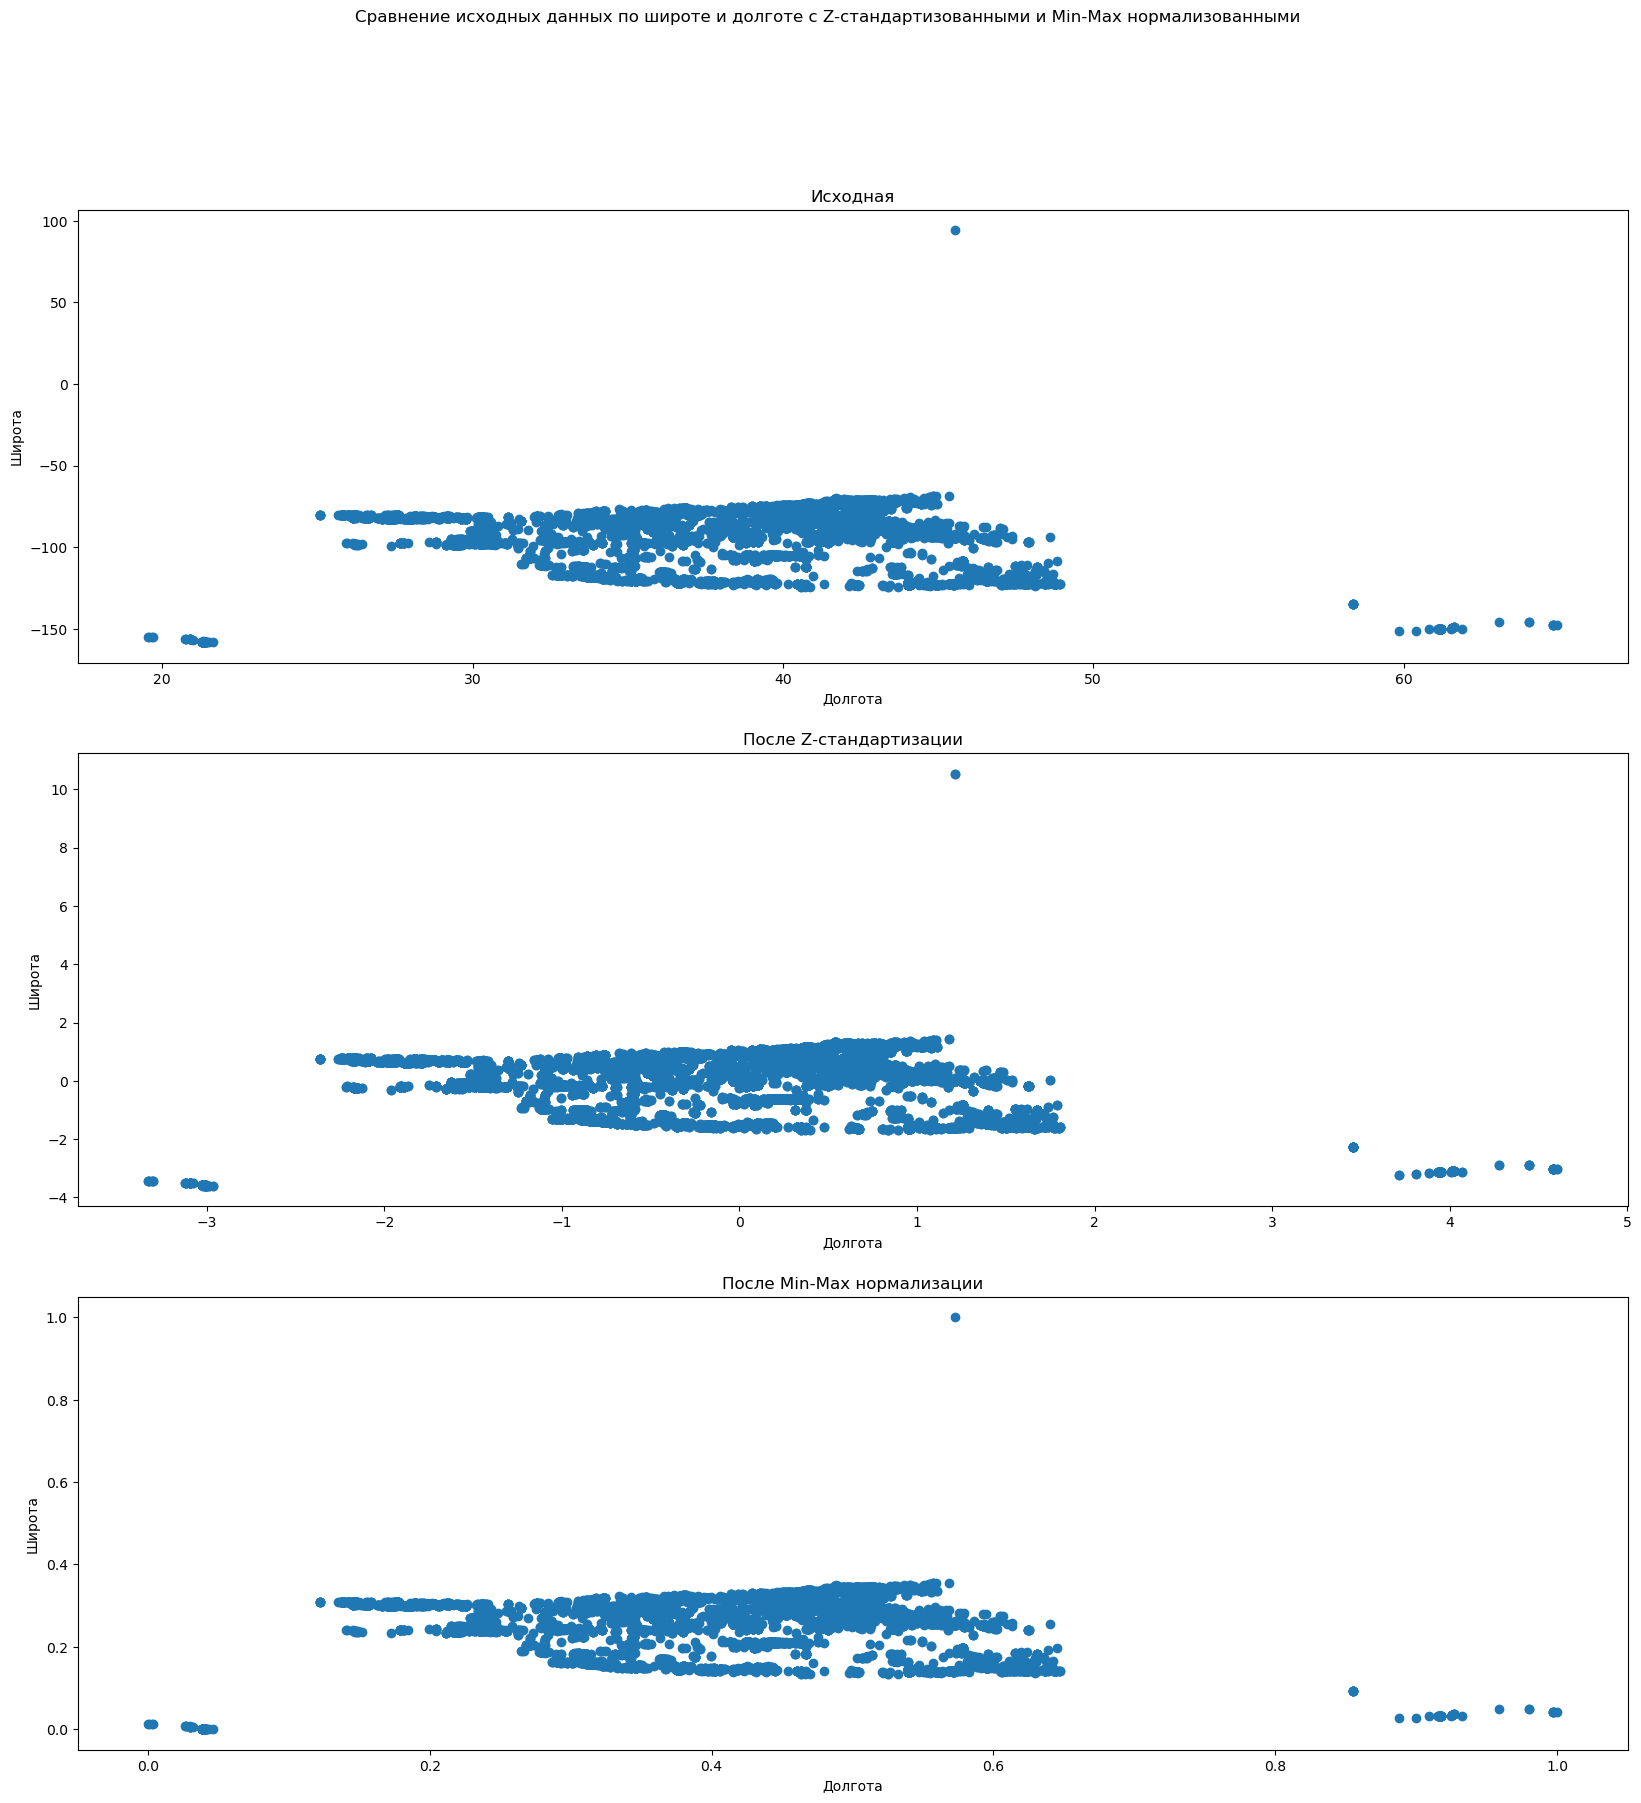

In [55]:
#22 StandardScaler
std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(data_lat_long)

# MinMaxScaler
mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(data_lat_long)

# Add columns to df
df['lat_std'] = std_scaled[:,0]
df['long_std'] = std_scaled[:,1]
df['lat_mm'] = mm_scaled[:,0]
df['long_mm'] = mm_scaled[:,1]

# Calculate correlation matrix
corr_matrix = df[['lat', 'long', 'lat_std', 'long_std', 'lat_mm', 'long_mm']].corr()
print(corr_matrix)

# Plotting 
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))

ax1.scatter(df.lat, df.long)
ax1.set_title('Исходная')  
ax1.set_ylabel('Широта')
ax1.set_xlabel('Долгота')

ax2.scatter(df.lat_std, df.long_std) 
ax2.set_title('После Z-стандартизации')
ax2.set_ylabel('Широта')
ax2.set_xlabel('Долгота')

ax3.scatter(df.lat_mm, df.long_mm)
ax3.set_title('После Min-Max нормализации')  
ax3.set_ylabel('Широта')
ax3.set_xlabel('Долгота')

fig.suptitle('Сравнение исходных данных по широте и долготе с Z-стандартизованными и Min-Max нормализованными');

# Save encoded dataframe
df.to_csv('vehicles_normalized.csv', index=False)

print('DataFrame encoded and saved')

### Задача 5. Признаки на основе дат

1. Выведите по отдельности колонки `posting_date` и `date`. 

In [38]:
# Print 'posting_date' and 'date' columns
print(df[['posting_date', 'date']])

                  posting_date                       date
0     2021-04-17T12:30:50-0400  2021-04-17 16:30:50+00:00
1     2021-05-03T15:40:21-0400  2021-05-03 19:40:21+00:00
2     2021-04-28T03:52:20-0700  2021-04-28 10:52:20+00:00
3     2021-04-17T10:08:57-0400  2021-04-17 14:08:57+00:00
4     2021-04-08T15:10:56-0400  2021-04-08 19:10:56+00:00
...                        ...                        ...
9614  2021-04-10T16:33:57-0400  2021-04-10 20:33:57+00:00
9615  2021-05-03T09:36:30-0400  2021-05-03 13:36:30+00:00
9616  2021-04-22T12:14:01-0700  2021-04-22 19:14:01+00:00
9617  2021-04-14T09:14:42-0500  2021-04-14 14:14:42+00:00
9618  2021-04-24T13:50:49-0400  2021-04-24 17:50:49+00:00

[9619 rows x 2 columns]


2. Ранее преобразованная колонка `date` после сохранения в файл и загрузки из него содержит данные в строковом формате, поэтому измените её тип c помощью `pd.to_datetime`.

In [39]:
# 24
df['date'] = pd.to_datetime(df['date'])
df['date']

0      2021-04-17 16:30:50+00:00
1      2021-05-03 19:40:21+00:00
2      2021-04-28 10:52:20+00:00
3      2021-04-17 14:08:57+00:00
4      2021-04-08 19:10:56+00:00
                  ...           
9614   2021-04-10 20:33:57+00:00
9615   2021-05-03 13:36:30+00:00
9616   2021-04-22 19:14:01+00:00
9617   2021-04-14 14:14:42+00:00
9618   2021-04-24 17:50:49+00:00
Name: date, Length: 9619, dtype: datetime64[ns, UTC]

In [40]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])
print(df['date'])

0      2021-04-17 16:30:50+00:00
1      2021-05-03 19:40:21+00:00
2      2021-04-28 10:52:20+00:00
3      2021-04-17 14:08:57+00:00
4      2021-04-08 19:10:56+00:00
                  ...           
9614   2021-04-10 20:33:57+00:00
9615   2021-05-03 13:36:30+00:00
9616   2021-04-22 19:14:01+00:00
9617   2021-04-14 14:14:42+00:00
9618   2021-04-24 17:50:49+00:00
Name: date, Length: 9619, dtype: datetime64[ns, UTC]


3. Несколькими способами извлеките номер месяца продажи автомобиля.

3.1. Из переменной `posting_date` с помощью lambda-функции и операций над строками.

In [42]:
# Print 'posting_date' and 'date' columns
print(df[['posting_date', 'date']])

                  posting_date                      date
0     2021-04-17T12:30:50-0400 2021-04-17 16:30:50+00:00
1     2021-05-03T15:40:21-0400 2021-05-03 19:40:21+00:00
2     2021-04-28T03:52:20-0700 2021-04-28 10:52:20+00:00
3     2021-04-17T10:08:57-0400 2021-04-17 14:08:57+00:00
4     2021-04-08T15:10:56-0400 2021-04-08 19:10:56+00:00
...                        ...                       ...
9614  2021-04-10T16:33:57-0400 2021-04-10 20:33:57+00:00
9615  2021-05-03T09:36:30-0400 2021-05-03 13:36:30+00:00
9616  2021-04-22T12:14:01-0700 2021-04-22 19:14:01+00:00
9617  2021-04-14T09:14:42-0500 2021-04-14 14:14:42+00:00
9618  2021-04-24T13:50:49-0400 2021-04-24 17:50:49+00:00

[9619 rows x 2 columns]


In [43]:
# Using lambda function and month method
months = df['date'].apply(lambda x: x.month)

print(months)

0       4
1       5
2       4
3       4
4       4
       ..
9614    4
9615    5
9616    4
9617    4
9618    4
Name: date, Length: 9619, dtype: int64


In [44]:
import pandas as pd
import timeit

# Convert string dates to datetime
df['date'] = pd.to_datetime(df['date'])   

# From date using lambda function  
time1 = timeit.timeit(lambda: df['date'].apply(lambda x: x.strftime('%Y-%m-%d').split('-')[1]), number=1000)

# Using .str accessor     
time2 = timeit.timeit(lambda: df['date'].dt.strftime('%Y-%m-%d').str.split('-').str[1], number=1000)

# Using .dt accessor    
time3 = timeit.timeit(lambda: df['date'].dt.month, number=1000)

print(f"Lambda function: {time1}")   
print(f".str accessor: {time2}")  
print(f".dt accessor: {time3}")

Lambda function: 91.09174699999858
.str accessor: 56.42131710000103
.dt accessor: 0.46275059998151846


3.2. Из переменной `date` с помощью lambda-функции и метода `month`.

In [45]:
# Convert string dates to datetime
import pandas as pd

df['date'] = pd.to_datetime(df['date'])

# Using lambda function and month method
months = df['date'].apply(lambda x: x.month)

print(months)

0       4
1       5
2       4
3       4
4       4
       ..
9614    4
9615    5
9616    4
9617    4
9618    4
Name: date, Length: 9619, dtype: int64


3.3. Из переменной `date` с помощью `dt` и метода `month`.

In [46]:
# Convert string dates to datetime
import pandas as pd

df['date'] = pd.to_datetime(df['date'])

# Using .dt accessor and month method
months = df['date'].dt.month

print(months)

0       4
1       5
2       4
3       4
4       4
       ..
9614    4
9615    5
9616    4
9617    4
9618    4
Name: date, Length: 9619, dtype: int64


4. Создайте любым из способов (3.2 или 3.3) признак `month`, обозначающий номер месяца размещения объявления о продаже автомобиля, и распечатайте его.

In [48]:
# 28
df['month'] = df['posting_date'].apply(lambda x: int(x.split('-')[1]))
print(df['month'])

0       4
1       5
2       4
3       4
4       4
       ..
9614    4
9615    5
9616    4
9617    4
9618    4
Name: month, Length: 9619, dtype: int64


5. Создайте признак `dayofweek`, обозначающий день недели размещения объявления о продаже автомобиля, и распечатайте его.

In [49]:
# 30
df['dayofweek'] = df['date'].dt.dayofweek
print(df['dayofweek'])

0       5
1       0
2       2
3       5
4       3
       ..
9614    5
9615    0
9616    3
9617    2
9618    5
Name: dayofweek, Length: 9619, dtype: int64


6. Создайте признак `diff_years`, обозначающий количество лет между годом производства автомобиля и годом размещения объявления о продаже автомобиля, и распечатайте его. Дополнительные корректировки не применяйте.

In [50]:
# 31
df['diff_years'] = df['date'].dt.year - df['year']
print(df['diff_years'])

0        1
1        5
2        4
3        8
4        9
        ..
9614    19
9615    13
9616    10
9617     6
9618     4
Name: diff_years, Length: 9619, dtype: int64


7. Примените стандартизацию к новым признаками и сохраните результат в новые признаки вида `month_std`.

In [53]:
# Create StandardScaler
scaler = StandardScaler() 

# Fit and transform month column
df['month_std'] = scaler.fit_transform(df[['month']])

# Fit and transform diff_years column
df['diff_years_std'] = scaler.fit_transform(df[['diff_years']])

print(df)

              id                                                url  \
0     7308295377  https://chattanooga.craigslist.org/ctd/d/chatt...   
1     7316380095  https://newjersey.craigslist.org/ctd/d/carlsta...   
2     7313733749  https://reno.craigslist.org/ctd/d/atlanta-2017...   
3     7308210929  https://fayetteville.craigslist.org/ctd/d/rale...   
4     7303797340  https://knoxville.craigslist.org/ctd/d/knoxvil...   
...          ...                                                ...   
9614  7304876387  https://chautauqua.craigslist.org/ctd/d/falcon...   
9615  7316152972  https://binghamton.craigslist.org/ctd/d/roches...   
9616  7310993818  https://salem.craigslist.org/ctd/d/salem-2011-...   
9617  7306637427  https://madison.craigslist.org/ctd/d/madison-2...   
9618  7311960763  https://norfolk.craigslist.org/ctd/d/chesapeak...   

                       region                           region_url  price  \
0                 chattanooga   https://chattanooga.craigslist.org  54

In [56]:
# Create StandardScaler
scaler = StandardScaler() 

# Fit and transform month column, dayofweek column, diff_years column
df[['month_std', 'dayofweek_std', 'diff_years_std']] = scaler.fit_transform(df[['month', 'dayofweek', 'diff_years']])
print(df)

              id                                                url  \
0     7308295377  https://chattanooga.craigslist.org/ctd/d/chatt...   
1     7316380095  https://newjersey.craigslist.org/ctd/d/carlsta...   
2     7313733749  https://reno.craigslist.org/ctd/d/atlanta-2017...   
3     7308210929  https://fayetteville.craigslist.org/ctd/d/rale...   
4     7303797340  https://knoxville.craigslist.org/ctd/d/knoxvil...   
...          ...                                                ...   
9614  7304876387  https://chautauqua.craigslist.org/ctd/d/falcon...   
9615  7316152972  https://binghamton.craigslist.org/ctd/d/roches...   
9616  7310993818  https://salem.craigslist.org/ctd/d/salem-2011-...   
9617  7306637427  https://madison.craigslist.org/ctd/d/madison-2...   
9618  7311960763  https://norfolk.craigslist.org/ctd/d/chesapeak...   

                       region                           region_url  price  \
0                 chattanooga   https://chattanooga.craigslist.org  54

### Задача 6. Сохранение датафрейма для этапа моделирования

1. Удалите колонки, которые были исходными для формирования признаков, а также новые признаки, которые были добавлены с целью обучения.  Сохраните новый датафрейм в переменную `df_prepared`.

In [57]:
# 33
columns_to_drop = ['posting_date', 'date', 'month', 'dayofweek', 'diff_years'] + numeric_cols + categorical_cols
df_prepared = df.drop(columns_to_drop, axis=1)

2. Распечатайте оставшийся список колонок и размерность финального датафрейма.

In [58]:
# 34
print(df_prepared.columns)
print(df_prepared.shape)

Index(['id', 'url', 'region_url', 'price', 'model', 'fuel', 'odometer',
       'image_url', 'description', 'price_category',
       ...
       'title_status_parts only', 'title_status_rebuilt',
       'title_status_salvage', 'age_category_average', 'age_category_new',
       'age_category_old', 'month_from_posting_date', 'month_std',
       'diff_years_std', 'dayofweek_std'],
      dtype='object', length=1472)
(9619, 1472)


3. Запишите преобразованный датафрейм в файл `data/vehicles_dataset_prepared.csv`, индекс не сохраняйте.

In [60]:
# 35
df_prepared.to_csv('C:\\Users\\user\\Downloads\\vehicles_dataset_prepared.csv' , index=False)

## Описание преобразованного датасета:
- `id`— идентификатор записи;
- `is_manufacturer_name`— признак производителя автомобиля;

- `region_*`— регион;
- `x0_*`— тип топлива;
- `manufacturer_*`— производитель;
- `short_model_*`— сокращённая модель автомобиля;
- `title_status_*`— статус;
- `transmission_*`— коробка передач;
- `state_*`— штат;
- `age_category_*`— возрастная категория автомобиля;

- `std_scaled_odometer`— количество пройденных миль (после стандартизации);
- `year_std`— год выпуска (после стандартизации);
- `lat_std`— широта (после стандартизации);
- `long_std`— долгота (после стандартизации);
- `odometer/price_std`— отношение стоимости к пробегу автомобиля (после стандартизации);
- `desc_len_std`— количество символов в тексте объявления о продаже (после стандартизации);
- `model_in_desc_std`— количество наименований модели автомобиля в тексте объявления о продаже (после стандартизации);
- `model_len_std`— длина наименования автомобиля (после стандартизации);
- `model_word_count_std`— количество слов в наименовании автомобиля (после стандартизации);
- `month_std`— номер месяца размещения объявления о продаже автомобиля (после стандартизации);
- `dayofweek_std`— день недели размещения объявления о продаже автомобиля (после стандартизации);
- `diff_years_std`— количество лет между годом производства автомобиля и годом размещения объявления о продаже автомобиля (после стандартизации);

- `price`— стоимость;
- `price_category`– категория цены.